# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [3]:
print(cities)

['salalah', 'grand gaube', 'pisco', 'san patricio', 'saleaula', 'havre-saint-pierre', 'illoqqortoormiut', 'saint-philippe', 'kasongo-lunda', 'hermanus', 'bluff', 'shingu', 'barentsburg', 'benito juarez', 'luderitz', 'punta arenas', 'marcona', 'bethel', 'clarksburg', 'lavrentiya', 'karaul', 'belushya guba', 'derzhavinsk', 'toungoo', 'lebu', 'faya', 'souillac', 'tomatlan', 'nizhnevartovsk', 'tuktoyaktuk', 'mataura', 'qaanaaq', 'vaini', 'albany', 'ilulissat', 'mehamn', 'barawe', 'ushuaia', 'mount isa', 'naze', 'hithadhoo', 'kruisfontein', 'new norfolk', 'bilma', 'upernavik', 'rikitea', 'komsomolskiy', 'provideniya', 'sorland', 'los llanos de aridane', 'mahebourg', 'inhambane', 'siilinjarvi', 'chuy', 'shahr-e kord', 'butaritari', 'haimen', 'ghanzi', 'pleasanton', 'eisenhuttenstadt', 'arraial do cabo', 'brandon', 'hobart', 'rungata', 'taolanaro', 'fortuna', 'huarmey', 'nikolskoye', 'port alfred', 'san luis', 'talnakh', 'kawalu', 'xai-xai', 'hilo', 'sehithwa', 'lahuachaca', 'sainte-maxime', 

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls. Think: how do you do anything successively?
* Make sure each city in your dataset includes coordinates, country, max temperature, pressure, humidity and wind speed
* Use a try-except to handle errors (they will occur)
* Include a print log of each city as it'sbeing processed (with the city number and city name). City number is just going to count which city is being processed 


In [4]:
city_weather = {'City':[],
                'Cloudiness':[],
                'Country':[],
                'Date':[],
               'Humidity':[],
                'Lat':[],
                'Lng':[],
                'Max Temp':[],
                "Wind Speed":[]
               }

#loop over cities and add data to dictionary
for number,city in enumerate(cities):
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + api_key

    try:
        #q represents the city
        req = requests.get(base_url + f'&q={city}')
        
        data = req.json()
        
        #add values to our city_weather dictionary
        city_weather['City'].append(data['name'])
        city_weather['Cloudiness'].append(data['clouds']['all'])
        city_weather['Country'].append(data['sys']['country'])
        city_weather['Date'].append(data['sys']['sunrise'])
        city_weather['Humidity'].append(data['main']['humidity'])
        city_weather['Lat'].append(data['coord']['lat'])
        city_weather['Lng'].append(data['coord']['lon'])
        city_weather['Max Temp'].append(data['main']['temp_max'])
        city_weather['Wind Speed'].append(data['wind']['speed'])
        print(str(number+1)+" processing " + city)
        #note: data['id'] --> api stops working
    except:
        print(city+ " not found")
        pass


1 processing salalah
2 processing grand gaube
3 processing pisco
4 processing san patricio
saleaula not found
6 processing havre-saint-pierre
illoqqortoormiut not found
8 processing saint-philippe
9 processing kasongo-lunda
10 processing hermanus
11 processing bluff
12 processing shingu
barentsburg not found
14 processing benito juarez
15 processing luderitz
16 processing punta arenas
marcona not found
18 processing bethel
19 processing clarksburg
20 processing lavrentiya
karaul not found
belushya guba not found
23 processing derzhavinsk
toungoo not found
25 processing lebu
26 processing faya
27 processing souillac
28 processing tomatlan
29 processing nizhnevartovsk
30 processing tuktoyaktuk
31 processing mataura
32 processing qaanaaq
33 processing vaini
34 processing albany
35 processing ilulissat
36 processing mehamn
barawe not found
38 processing ushuaia
39 processing mount isa
40 processing naze
41 processing hithadhoo
42 processing kruisfontein
43 processing new norfolk
44 process

347 processing raudeberg
348 processing geraldton
349 processing cap-aux-meules
350 processing seoul
351 processing fukue
352 processing nuuk
353 processing stettler
354 processing san ramon
355 processing abu dhabi
356 processing pueblo bello
357 processing ashland
el faiyum not found
359 processing presidencia roque saenz pena
360 processing piet retief
361 processing baykit
362 processing mandalgovi
363 processing talavera
364 processing manturovo
365 processing alice springs
366 processing khandbari
367 processing rio brilhante
368 processing husavik
369 processing pangai
370 processing khatanga
371 processing praia
372 processing san carlos de bariloche
louisbourg not found
374 processing kirakira
panixtlahuaca not found
sedelnikovo not found
377 processing qaqortoq
378 processing vao
379 processing zlobin
380 processing leon valley
panjwin not found
382 processing vikevag
383 processing grenada
384 processing udachnyy
385 processing kupang
386 processing kaitangata
387 processing

In [5]:
print(city_weather)

{'City': ['Salalah', 'Grand Gaube', 'Pisco', 'San Patricio', 'Havre-St-Pierre', 'Saint-Philippe', 'Kasongo-Lunda', 'Hermanus', 'Bluff', 'Shingū', 'Benito Juarez', 'Lüderitz', 'Punta Arenas', 'Bethel', 'Clarksburg', 'Lavrentiya', 'Derzhavīnsk', 'Lebu', 'Faya', 'Souillac', 'Tomatlán', 'Nizhnevartovsk', 'Tuktoyaktuk', 'Mataura', 'Qaanaaq', 'Vaini', 'Albany', 'Ilulissat', 'Mehamn', 'Ushuaia', 'Mount Isa', 'Naze', 'Hithadhoo', 'Kruisfontein', 'New Norfolk', 'Bilma', 'Upernavik', 'Rikitea', 'Yangi Marg`ilon', 'Provideniya', 'Sørland', 'Los Llanos de Aridane', 'Mahébourg', 'Inhambane', 'Siilinjärvi', 'Chui', 'Shahr-e Kord', 'Butaritari', 'Haimen', 'Ghanzi', 'Pleasanton', 'Arraial do Cabo', 'Brandon', 'Hobart', 'Fortuna', 'Huarmey', 'Nikolskoye', 'Port Alfred', 'San Luis', 'Talnakh', 'Kawalu', 'Xai-Xai', 'Hilo', 'Sehithwa', 'Lahuachaca', 'Sainte-Maxime', 'Port Elizabeth', 'Saint-Joseph', 'Penzance', 'Klaksvík', 'Atambua', 'Yeppoon', 'Teya', 'Kindu', 'Aleppo Governorate', 'Sitka', 'Oshikango', 

### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [6]:
weather_df = pd.DataFrame.from_dict(city_weather)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Salalah,26,OM,1635041925,69,17.0151,54.0924,76.42,4.05
1,Grand Gaube,93,MU,1635039144,76,-20.0064,57.6608,75.60,7.00
2,Pisco,6,PE,1634985245,68,-13.7000,-76.2167,66.25,24.16
3,San Patricio,16,US,1634992521,51,28.0170,-97.5169,88.52,15.61
4,Havre-St-Pierre,90,CA,1634986192,100,50.2334,-63.5986,48.20,3.44
...,...,...,...,...,...,...,...,...,...
549,North Bend,90,US,1635000061,97,43.4065,-124.2243,58.95,11.50
550,Fort Nelson,75,CA,1635001632,100,58.8053,-122.7002,36.99,0.00
551,Chernyshevskiy,72,RU,1635032529,83,63.0128,112.4714,28.47,10.29
552,Okha,100,RU,1635023487,97,53.5739,142.9478,37.06,15.08


In [7]:
weather_df.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [8]:
weather_df.to_csv('weather.csv',index=False)

In [9]:
check_df= pd.read_csv('weather.csv')
check_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Salalah,26,OM,1635041925,69,17.0151,54.0924,76.42,4.05
1,Grand Gaube,93,MU,1635039144,76,-20.0064,57.6608,75.60,7.00
2,Pisco,6,PE,1634985245,68,-13.7000,-76.2167,66.25,24.16
3,San Patricio,16,US,1634992521,51,28.0170,-97.5169,88.52,15.61
4,Havre-St-Pierre,90,CA,1634986192,100,50.2334,-63.5986,48.20,3.44
...,...,...,...,...,...,...,...,...,...
549,North Bend,90,US,1635000061,97,43.4065,-124.2243,58.95,11.50
550,Fort Nelson,75,CA,1635001632,100,58.8053,-122.7002,36.99,0.00
551,Chernyshevskiy,72,RU,1635032529,83,63.0128,112.4714,28.47,10.29
552,Okha,100,RU,1635023487,97,53.5739,142.9478,37.06,15.08


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* Save the plotted figures as .pngs and embed those pngs in your readme file.

#### Latitude vs. Temperature Plot

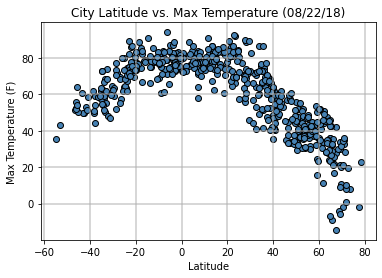

In [10]:
fig,ax = plt.subplots()
ax.scatter(weather_df["Lat"], weather_df["Max Temp"],color = "steelblue", edgecolor = "black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature (08/22/18)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.show()
fig.savefig('Lat_Temp.png')

#### Latitude vs. Humidity Plot

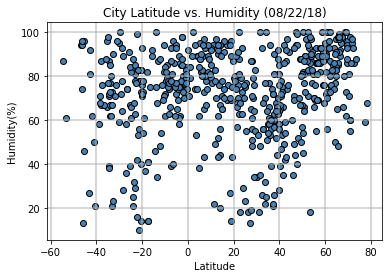

In [11]:
fig,ax = plt.subplots()
ax.scatter(weather_df["Lat"], weather_df["Humidity"],color = "steelblue", edgecolor = "black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity(%)")
ax.set_title("City Latitude vs. Humidity (08/22/18)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.show()
fig.savefig('Lat_Humidity.png')

#### Latitude vs. Cloudiness Plot

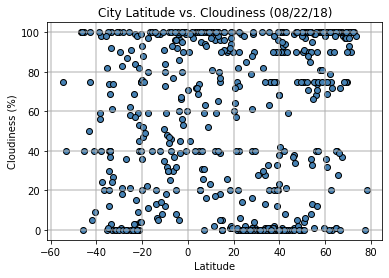

In [12]:
fig,ax = plt.subplots()
ax.scatter(weather_df["Lat"], weather_df["Cloudiness"],color = "steelblue", edgecolor = "black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("City Latitude vs. Cloudiness (08/22/18)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.show()
fig.savefig('Lat_Cloudiness.png')

#### Latitude vs. Wind Speed Plot

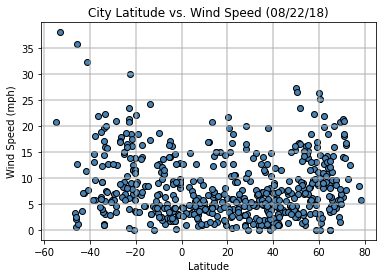

In [13]:
fig,ax = plt.subplots()
ax.scatter(weather_df["Lat"], weather_df["Wind Speed"],color = "steelblue", edgecolor = "black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("City Latitude vs. Wind Speed (08/22/18)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.show()
fig.savefig('Lat_Wind Speed.png')

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

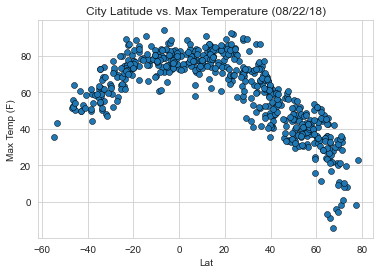

In [38]:
sns.set_style("whitegrid")
lat_max_temp=sns.scatterplot(x="Lat", y="Max Temp",data=weather_df,palette= "steelblue", edgecolor = "black")
lat_max_temp.set_title("City Latitude vs. Max Temperature (08/22/18)")
lat_max_temp.set(ylabel="Max Temp (F)")
plt.show()

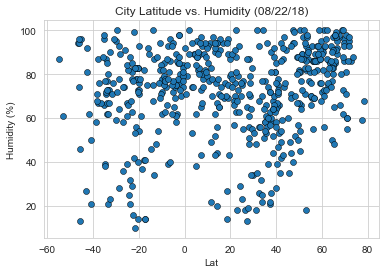

In [39]:
sns.set_style("whitegrid")
lat_humid=sns.scatterplot(x="Lat", y="Humidity",data=weather_df,palette= "steelblue",edgecolor = "black")
lat_humid.set_title("City Latitude vs. Humidity (08/22/18)")
lat_humid.set(ylabel="Humidity (%)")
plt.show()

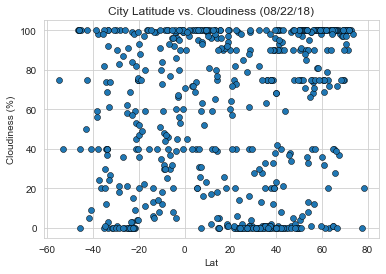

In [40]:
sns.set_style("whitegrid")
lat_cloud=sns.scatterplot(x="Lat", y="Cloudiness",data=weather_df,palette= "steelblue",edgecolor = "black")
lat_cloud.set_title("City Latitude vs. Cloudiness (08/22/18)")
lat_cloud.set(ylabel="Cloudiness (%)")
plt.show()

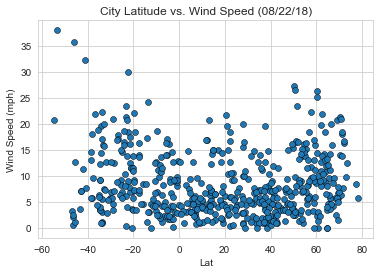

In [41]:
sns.set_style("whitegrid")
lat_wind=sns.scatterplot(x="Lat", y="Wind Speed",data=weather_df,palette= "steelblue",edgecolor = "black")
lat_wind.set_title("City Latitude vs. Wind Speed (08/22/18)")
lat_wind.set(ylabel="Wind Speed (mph)")
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

- The cities near the equator have the highest temperture while cities farthest from the equator have the lowest temperature. The temperature decreases depending on how much farther the cities are from the equator.
- Most of cities' wind speed are in the lower range such as 0-10 mph. Some of the cities as it gets closer to the north pole, the wind speed increases as well
- Most of cities have high humidity level of 80 to 100%

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 

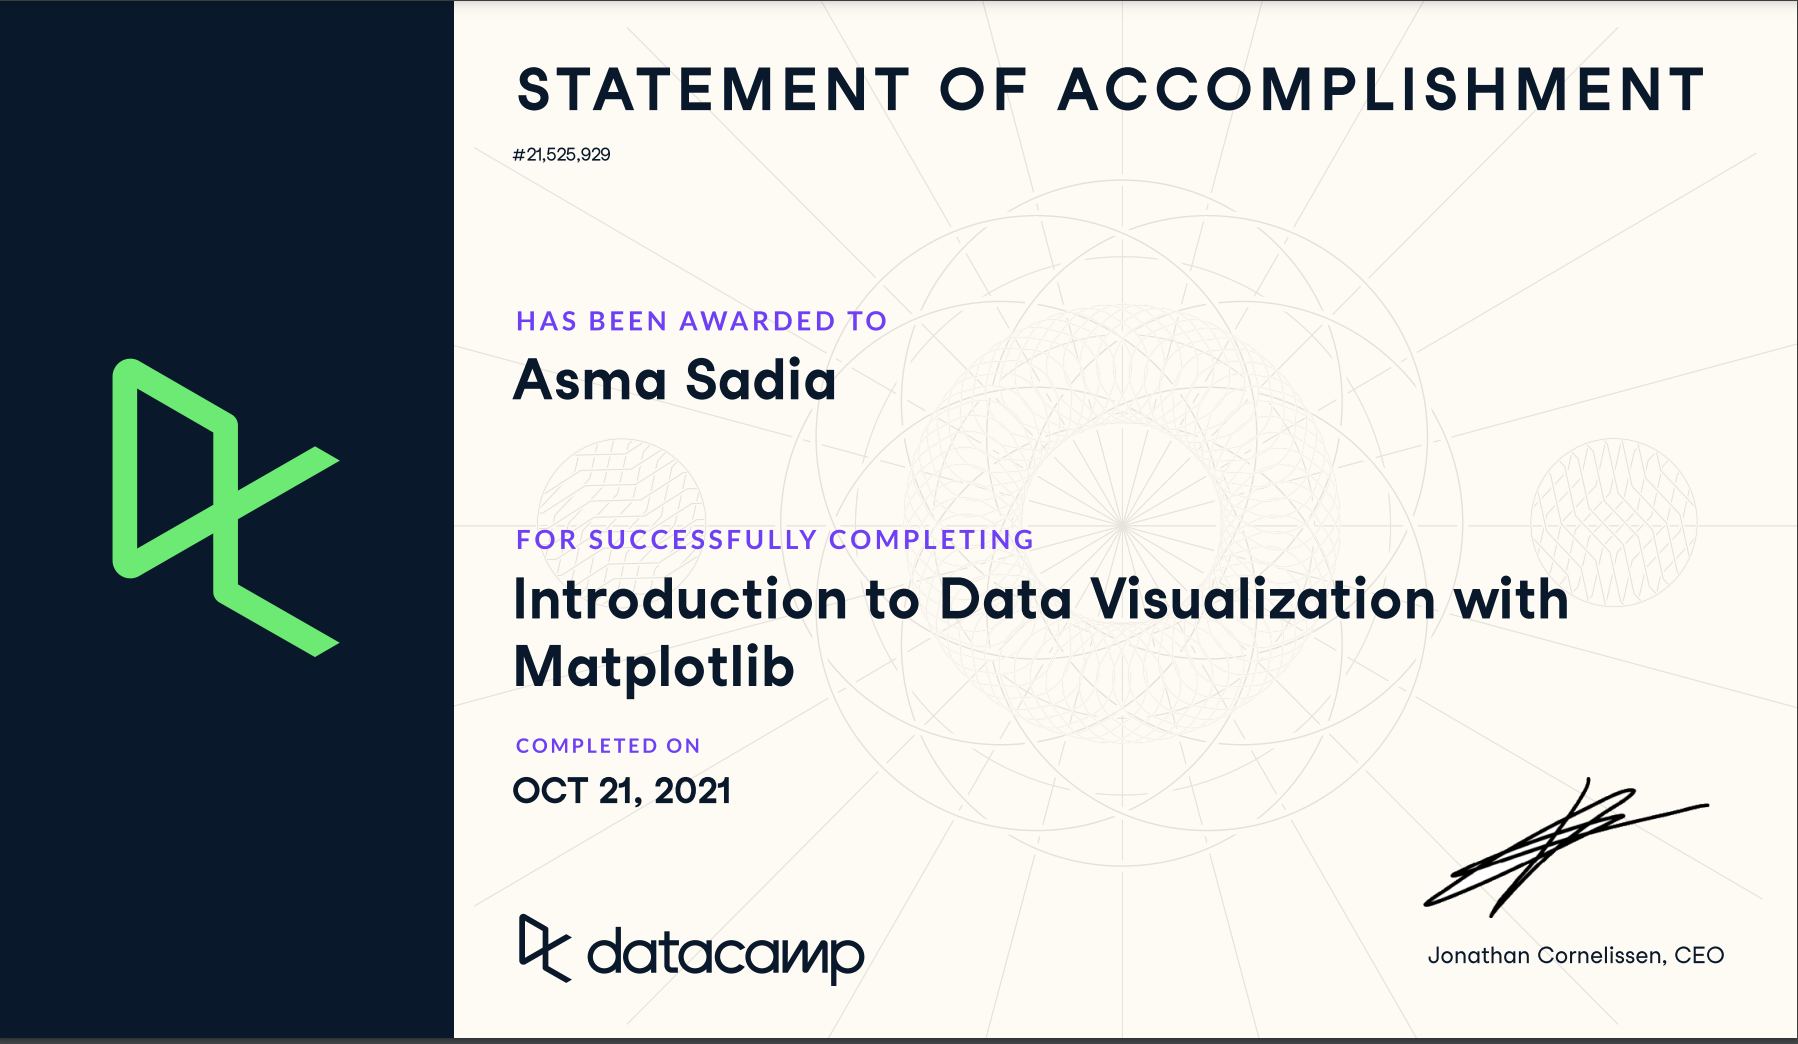

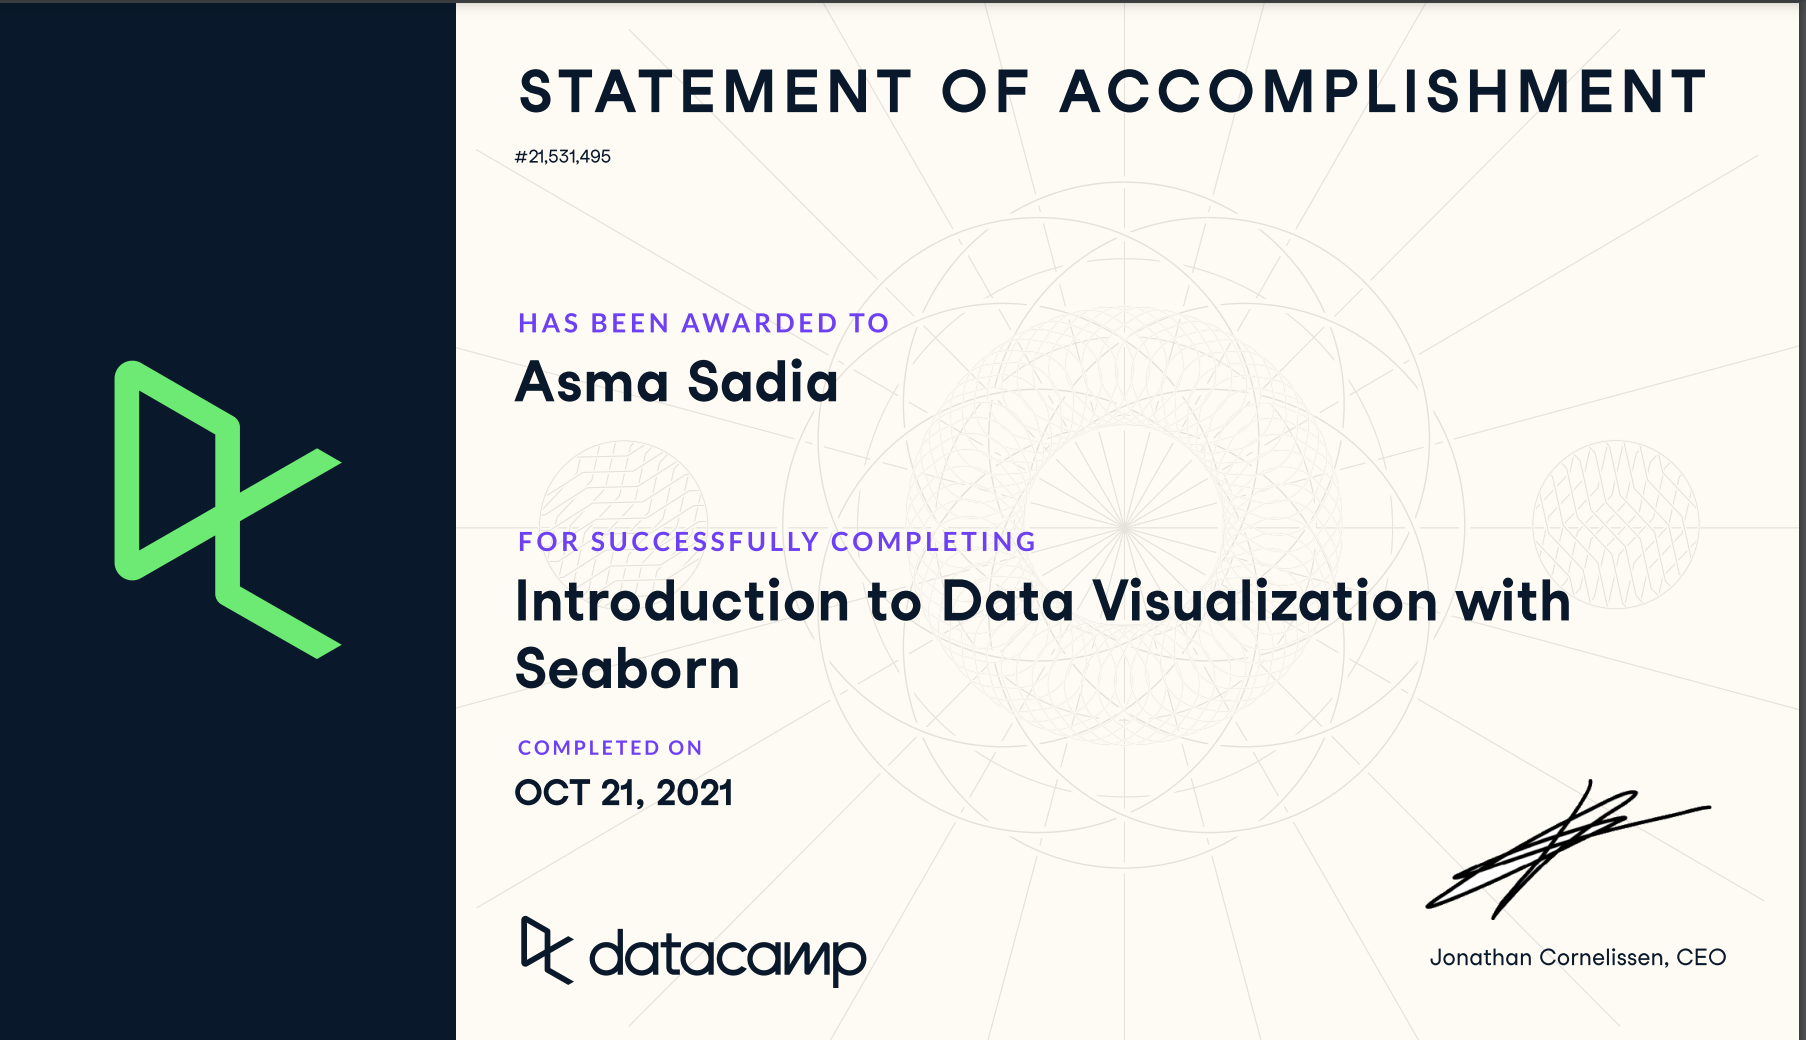